In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compareProbabilityDensityOfAgesInCategory(full,subcat):
    fig,ax = plt.subplots()
    full['Age'].plot.kde(ax=ax,label="Full Data, Ages")
    full[full[subcat]==1.0]['Age'].plot.kde(ax=ax, label="{}, Ages".format(subcat))
    ax.set_ylabel('Probability')
    ax.legend()
    
    sub = full[full[subcat]==1.0]
    diff_mean = full['Age'].mean() - sub['Age'].mean()
    print("difference in age means: {}".format(diff_mean))
    diff_var = full['Age'].var() - sub['Age'].var()
    print("difference in age variances: {}".format(diff_var))

In [3]:
df = pd.read_csv('./data/train_plusMeta.csv') # training data from CheXpert-v1.0-small
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,PID,StudyID
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1,1
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,2,2
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,1
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,1
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3,1


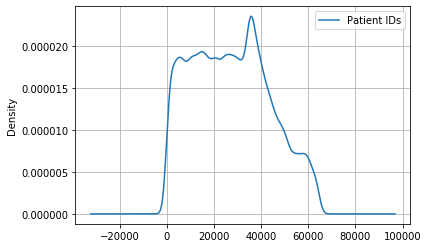

In [4]:
# look at distribution of patient IDs
fig,ax = plt.subplots()
df['PID'].plot.kde(ax=ax,label="Patient IDs")
ax.grid('y')
ax.legend()

The above figure shows the frequency of imaging studies associated with a given patient in the training dataset. 

max number of images per study for a patient: 3
min number of images per study for a patient: 1
avg number of images per study for a patient: 1.190645967565724
variance of number of images per study for a patient: 0.17326274676157888


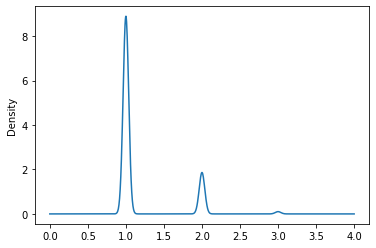

In [16]:
pvt = df.groupby(['PID','StudyID']).agg('size')
print('max number of images per study per patient: {}'.format(pvt.max()))
print('min number of images per study per patient: {}'.format(pvt.min()))
print('avg number of images per study per patient: {}'.format(pvt.mean()))
print('variance of number of images per study per patient: {}'.format(pvt.var()))
pvt.plot.kde()

The distribution plot shows that it is very common for a patient to have a single image for their study. However, there are patients who have multiple (up to 3) images for a single study.

max number of studies per patient: 91
min number of studies per patient: 1
avg number of studies per patient: 2.9073597768825534
variance of number of studies per patient: 17.553930245368317


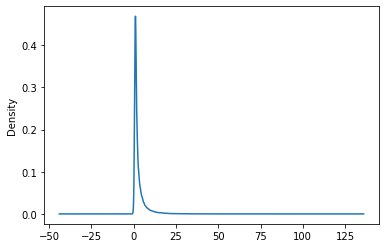

In [19]:
pvt = df.groupby(['PID'])['StudyID'].nunique()
print('max number of studies per patient: {}'.format(pvt.max()))
print('min number of studies per patient: {}'.format(pvt.min()))
print('avg number of studies per patient: {}'.format(pvt.mean()))
print('variance of number of studies per patient: {}'.format(pvt.var()))
pvt.plot.kde()

Looks like an exponential distribution (which is fair). There are a whole lot of patients who have had very few imaging studies and very few patients who have had many imaging studies.
Let's quickly take a look at that patient with the most (91) studies.

In [22]:
patient_with_most_studies = df[df['PID']==pvt[pvt==pvt.max()].index[0]]
patient_with_most_studies

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,PID,StudyID
138034,CheXpert-v1.0-small/train/patient33155/study16...,Female,64,Frontal,AP,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,33155,16
138035,CheXpert-v1.0-small/train/patient33155/study73...,Female,65,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,1.0,33155,73
138036,CheXpert-v1.0-small/train/patient33155/study67...,Female,65,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,-1.0,NaN,-1.0,NaN,1.0,NaN,NaN,1.0,33155,67
138037,CheXpert-v1.0-small/train/patient33155/study2/...,Female,64,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,33155,2
138038,CheXpert-v1.0-small/train/patient33155/study9/...,Female,64,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,33155,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138121,CheXpert-v1.0-small/train/patient33155/study15...,Female,64,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,1.0,33155,15
138122,CheXpert-v1.0-small/train/patient33155/study76...,Female,65,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,33155,76
138123,CheXpert-v1.0-small/train/patient33155/study74...,Female,65,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,33155,74
138124,CheXpert-v1.0-small/train/patient33155/study70...,Female,65,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,-1.0,NaN,-1.0,NaN,1.0,NaN,NaN,1.0,33155,70


How many of this patient's studies resulted in a finding of 'Lung Opacity'?

In [25]:
pwms_lo = patient_with_most_studies[patient_with_most_studies['Lung Opacity']==1.0]

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,PID,StudyID
138035,CheXpert-v1.0-small/train/patient33155/study73...,Female,65,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,1.0,33155,73
138037,CheXpert-v1.0-small/train/patient33155/study2/...,Female,64,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,33155,2
138039,CheXpert-v1.0-small/train/patient33155/study52...,Female,64,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,-1.0,NaN,-1.0,NaN,1.0,NaN,NaN,1.0,33155,52
138040,CheXpert-v1.0-small/train/patient33155/study35...,Female,64,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,33155,35
138041,CheXpert-v1.0-small/train/patient33155/study40...,Female,64,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,33155,40
138043,CheXpert-v1.0-small/train/patient33155/study80...,Female,65,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,-1.0,NaN,-1.0,NaN,1.0,NaN,NaN,1.0,33155,80
138044,CheXpert-v1.0-small/train/patient33155/study89...,Female,65,Frontal,AP,NaN,-1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,0.0,1.0,NaN,NaN,1.0,33155,89
138045,CheXpert-v1.0-small/train/patient33155/study14...,Female,64,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,-1.0,-1.0,1.0,1.0,NaN,NaN,1.0,33155,14
138046,CheXpert-v1.0-small/train/patient33155/study48...,Female,64,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,33155,48
138047,CheXpert-v1.0-small/train/patient33155/study90...,Female,65,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,33155,90


Now let's take a look at the subset of patients whose imaging studies showed no finding

difference in age means: 9.502321338406198
difference in age variances: 4.232494189332101


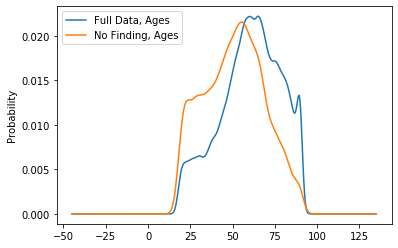

In [6]:
# investigate subset where there was no finding
compareProbabilityDensityOfAgesInCategory(df,'No Finding')

It is interesting that there is a pretty large shift in age distribution for imaging studies for which there were no findings compared to all the imaging studies conducted. Let's investigate further...

max number of studies for a patient: 21
min number of studies for a patient: 1
avg number of studies for a patient: 1.5981862325049985
variance of number of studies for a patient: 0.9280864050780739


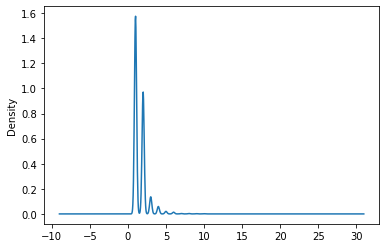

In [7]:
no_findings = df[df['No Finding']==1.0]
pvt = pd.pivot_table(no_findings, index='PID', aggfunc='size')
print('max number of studies for a patient: {}'.format(pvt.max()))
print('min number of studies for a patient: {}'.format(pvt.min()))
print('avg number of studies for a patient: {}'.format(pvt.mean()))
print('variance of number of studies for a patient: {}'.format(pvt.var()))
pvt.plot.kde()

Interestingly, there are multiple peaks for how many imaging studies an individual patient has had that contain No Findings. Perhaps this has to do with how many studies are performed in an individual encounter, which could all have the same result. But it is odd that there was a patient who had 21 studies performed that all had a result

In [8]:
pvt[pvt==pvt.max()]

PID
22987    21
dtype: int64

In [9]:
patient_with_most_noFindings = df[df['PID']==pvt[pvt==pvt.max()].index[0]]
patient_with_most_noFindings.to_csv('./data/patient{}.csv'.format(pvt[pvt==pvt.max()].index[0]), index=False)

In [10]:
# investigate subset where there was pneumothorax
#compareProbabilityDensityOfAgesInCategory(df,'Pneumothorax')

difference in age means: -1.0578932507343026
difference in age variances: 10.698870749881507


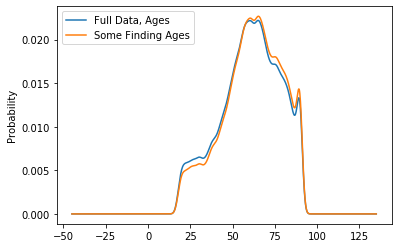

In [26]:
fig,ax = plt.subplots()
df['Age'].plot.kde(ax=ax,label="Full Data, Ages")
df[df['No Finding']!=1.0]['Age'].plot.kde(ax=ax, label="Some Finding Ages")
ax.set_ylabel('Probability')
ax.legend()

sub = df[df['No Finding']!=1.0]
diff_mean = df['Age'].mean() - sub['Age'].mean()
print("difference in age means: {}".format(diff_mean))
diff_var = df['Age'].var() - sub['Age'].var()
print("difference in age variances: {}".format(diff_var))

In [27]:
df.groupby(['Sex','Age']).count(['No Finding','Fracture','Pneumothorax','Lung Opacity','Enlarged Cardiomegaly'])

TypeError: count() takes 1 positional argument but 2 were given